# Graphical analysis of stresses: Mohr's circle


_From [Wikipedia](https://en.wikipedia.org/wiki/Mohr%27s_circle)_


Mohr's circle, named after Christian Otto Mohr, is a two-dimensional graphical representation of the transformation law for the Cauchy stress tensor.

After performing a stress analysis on a material body assumed as a continuum, the components of the Cauchy stress tensor at a particular material point are known with respect to a coordinate system. The Mohr circle is then used to determine graphically the stress components acting on a rotated coordinate system, i.e., acting on a differently oriented plane passing through that point.

The abscissa, $\sigma_\mathrm{n}$, and ordinate, $\tau_\mathrm{n}$, of each point on the circle, are the magnitudes of the normal stress and shear stress components, respectively, acting on the rotated coordinate system. In other words, the circle is the locus of points that represent the state of stress on individual planes at all their orientations, where the axes represent the principal axes of the stress element.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Mohr_Circle.svg/500px-Mohr_Circle.svg.png">


In [1]:
%matplotlib inline

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from IPython.html.widgets import interact
from IPython.display import display
from matplotlib import rcParams
 
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Mohr circle for 2D stresses

In [2]:
def mohr2d(S11=10, S12=0, S22=-5):
    """Plot Mohr circle for a 2D tensor"""
    center = [(S11 + S22)/2.0, 0.0]
    radius = np.sqrt((S11 - S22)**2/4.0 + S12**2)
    Smin = center[0] - radius
    Smax = center[0] + radius
    
    
    print "Minimum Normal Stress: ", np.round(Smin,6)
    print "Maximum Normal Stress: ", np.round(Smax, 6)
    print "Average Normal Stress: ", np.round(center[0], 6)
    print "Minimum Shear Stress: ", np.round(-radius, 6)
    print "Maximum Shear Stress: ", np.round(radius, 6)
   
    circ = plt.Circle((center[0],0), radius, facecolor='#cce885', lw=3,
    edgecolor='#5c8037') 
    plt.axis('image')
    ax = plt.gca() 
    ax.add_artist(circ)
    ax.set_xlim(Smin - .1*radius, Smax + .1*radius)
    ax.set_ylim(-1.1*radius, 1.1*radius)
    plt.plot([S22, S11], [S12, -S12], 'ko')
    plt.plot([S22, S11], [S12, -S12], 'k')
    plt.plot(center[0], center[1], 'o', mfc='w')
    plt.text(S22 + 0.1*radius, S12, 'A')
    plt.text(S11 + 0.1*radius, -S12, 'B')
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18) 
        

## Mohr circle for 3D stresses

Minimum Normal Stress:  -36.821877
Maximum Normal Stress:  41.821877
Average Normal Stress:  2.5
Minimum Shear Stress:  -39.321877
Maximum Shear Stress:  39.321877


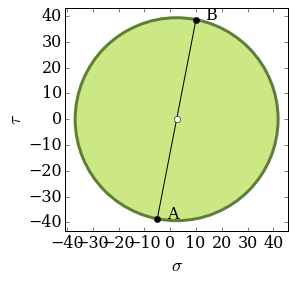

In [3]:
w = interact(mohr2d,
             S11=(-100.,100.),
             S12=(-100.,100.),
             S22=(-100.,100.))

In [4]:
def mohr3d(S11=90, S12=0, S13=95, S22=96, S23=0, S33=-50):
    r"""Plot 3D Mohr circles."""
    
    S = np.array([[S11, S12, S13],
                  [S12, S22, S23],
                  [S13, S23, S33]])
    
    S3, S2, S1 = eigvalsh(S)

    R_maj = 0.5*(S1 - S3)
    cent_maj = 0.5*(S1+S3)
    
    R_min = 0.5*(S2 - S3)
    cent_min = 0.5*(S2 + S3)
    
    R_mid = 0.5*(S1 - S2)
    cent_mid = 0.5*(S1 + S2)
    
    circ1 = plt.Circle((cent_maj,0), R_maj, facecolor='#cce885', lw=3,
                       edgecolor='#5c8037')
    circ2 = plt.Circle((cent_min,0), R_min, facecolor='w', lw=3,
                       edgecolor='#15a1bd')
    circ3 = plt.Circle((cent_mid,0), R_mid, facecolor='w', lw=3,
                       edgecolor='#e4612d')
    plt.axis('image')
    ax = plt.gca()
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    ax.add_artist(circ3)
    ax.set_xlim(S3 - .1*R_maj, S1 + .1*R_maj)
    ax.set_ylim(-1.1*R_maj, 1.1*R_maj)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)

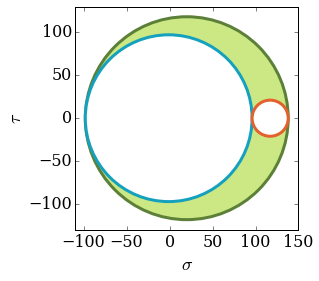

In [5]:
w = interact(mohr3d,
             S11=(-100.,100.),
             S12=(-100.,100.),
             S13=(-100.,100.),
             S22=(-100.,100.),
             S23=(-100.,100.),
             S33=(-100.,100.))